In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table; Station and Measurement
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date


('2017-08-23',)

In [12]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
print(f"{year_ago} is the date one year from the most recent date in the data set")

2016-08-23 is the date one year from the most recent date in the data set


In [13]:
# Perform a query to retrieve the data and precipitation scores
prcp_results= session.query(measurement.prcp, measurement.date).\
    filter(measurement.date >"2016-08-23").\
    order_by(measurement.date).all()
prcp_results


[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pre_df= pd.DataFrame(prcp_results, columns =["Precipation", "Dates"])
#set the index to the date column, # Sort the dataframe by date
pre_df.set_index("Dates")
pre_df

,Precipation,Dates
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24
...,...,...
2218,0.50,2017-08-22
2219,0.00,2017-08-23
2220,0.00,2017-08-23
2221,0.08,2017-08-23


In [1]:
# Use Pandas Plotting with Matplotlib to plot the data
pre_df.plot(figsize= (10,10))
pre_df.plot(x= "Dates")
plt.title("Twelve Months of Precipation ")
plt.show()
plt.savefig("precipation.png")

NameError: name 'pre_df' is not defined

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_df.describe()

,Precipation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count= session.query(measurement.station).distinct().count()
station_count

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temp= session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
active_station_temp

[(54.0, 85.0, 71.66378066378067)]

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_obs = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281' ).\
    filter(measurement.date >= '2017,8,23').all()
temp_obs


[(72.0,),
 (70.0,),
 (64.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (70.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (65.0,),
 (69.0,),
 (77.0,),
 (70.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (66.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (59.0,),
 (60.0,),
 (70.0,),
 (73.0,),
 (75.0,),
 (64.0,),
 (59.0,),
 (59.0,),
 (62.0,),
 (68.0,),
 (70.0,),
 (73.0,),
 (79.0,),
 (75.0,),
 (65.0,),
 (70.0,),
 (74.0,),
 (70.0,),
 (70.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (61.0,),
 (67.0,),
 (65.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (77.0,),
 (73.0,),
 (67.0,),
 (62.0,),
 (64.0,),
 (67.0,),
 (66.0,),
 (81.0,),
 (69.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (66.0,),
 (68.0,),
 (65.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (74.0,),
 (68.0,),
 (73.0,),
 (71.0,),
 (74.0,),
 (75.0,),
 (70.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (67.0,),


In [44]:
df= pd.DataFrame(temp_obs, columns= ['Tobs'] )
df

,Tobs
0,72.0
1,70.0
2,64.0
3,63.0
4,63.0
...,...
216,77.0
217,77.0
218,76.0
219,76.0


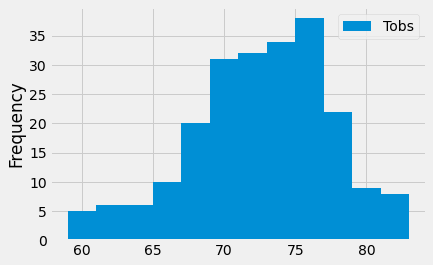

<Figure size 432x288 with 0 Axes>

In [47]:
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram
bins=12
df.plot.hist(temp_obs, bins)
plt.show()
plt.savefig("histogram.png")

# Close session

In [48]:
# Close Session
session.close()

Climate App

In [49]:
# Import Dependencies
from flask import Flask, jsonify

In [51]:
app= Flask(__name__)

In [52]:
#Now that you have completed your initial analysis, you’ll design a Flask API based on the queries that you have just developed.
#Use Flask to create your routes:
#Routes:
#* `/`
#`/api/v1.0/precipitation`
#* `/api/v1.0/stations`
#* `/api/v1.0/tobs`
# * `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`


In [53]:
#Homepage:
@app.route("/")
def welcome():
    return (
    f"Routes:<br/>"
    f"/api/v1.0/precipitation<br/>"
    f"/api/v1.0/stations<br/>"
    f"/api/v1.0/tobs<br/>"
    f"/api/v1.0/<start><br/>"
    f"/api/v1.0/<start>/<end><br/>"
    )
    

In [56]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    recent_date=dt.date(2017,8,23)
    year_ago= recent_date - dt.timedelta(days=365)
    
    temp= (session.query(measurement.date, measurement.prcp)
            .filter(measurement.date <= recent_date)
            .filter(measurement.date>= year_ago)
            .order_by(measurement.date).all())
    
    precipation = {date: prcp for date, prcp in temp}
    
    return jsonify(precipation)

In [57]:
#station
@app.route('/api/v1.0/stations')
def stations():
    stations= session.query(station.station).all()
    
    return jsonify(stations)

In [66]:
 #tobs
# @app.route('api/v1.0/tobs')

@app.route('/api/v1.0/tobs') 
def tobs_s():  
    recent_date = dt.date(2017, 8 ,23)
    year_ago = recent_date - dt.timedelta(days=365)

    lastyear = (session.query(measurement.tobs)
                .filter(measurement.station == 'USC00519281')
                .filter(measurement.date <= recent_date)
                .filter(measurement.date >= year_ago)
                .order_by(measurement.tobs).all())
    
    return jsonify(year)

In [72]:
#start
@app.route('/api/v1.0/<start>')
def start_date(start):
    start_1= session.query(func.min(measurement.tobs)\
        .filter(measurement.date.between(start, '2017-08-23')).all())
    
    start_df= pd.DataFrame(start_1)
    
    tavg=start_df["tobs"].mean()
    tmax= start_df["tobs"].max()
    tmin= start_df["tobs"].min()
    
    return jsonify(tavg,tmax, tmin)

In [79]:
#start/end
@app.route('/api/v1.0/<start>/<end>')
def start_end():
    start_1= session.query(func.min(measurement.tobs)\
    .filter(measurement.date.between(start, end)).all())
    
    start_df= pd.DataFrame(start_1)
    
    tavg=start_df["tobs"].mean()
    tmax= start_df["tobs"].max()
    tmin= start_df["tobs"].min()
    
    return jsonify(tavg, tmax, tmin)
           

In [82]:
if __name__=='__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\tcwil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
